In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores ausentes', 1 : '% do valor total'})
    return mis_val_table_ren_columns.loc[(mis_val_table_ren_columns!=0).any(axis=1)]

In [3]:
#load data
df = pd.read_csv("data/train.csv")

## Scatter plot geral - validar se os dados se apresentam de forma esparsa

In [4]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


## Visualização

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
import seaborn as sn

In [6]:
df2 = df[df.columns.difference(['ID_code','target'])].copy()

In [7]:
def pca_view(df2, n_components=4):
    pca = decomposition.PCA(n_components=n_components)
    pca.fit(df2)
    X = pca.transform(df2)
    print("Soma dos 3 primeiros componentes:",np.sum(pca.explained_variance_ratio_[0:3]))
    
    sn.barplot(list(range(1,len(pca.components_)+1)), 1*pca.explained_variance_ratio_)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), )
    plt.show()
    
    fig = plt.figure(1, figsize=(10, 10))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=134)
    plt.cla()
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Componente Principal 1', fontsize = 15)
    ax.set_ylabel('Componente Principal 2', fontsize = 15)

    ax.scatter(X[:, 0], X[:, 1], s = 50)
    plt.show()
    
    return X

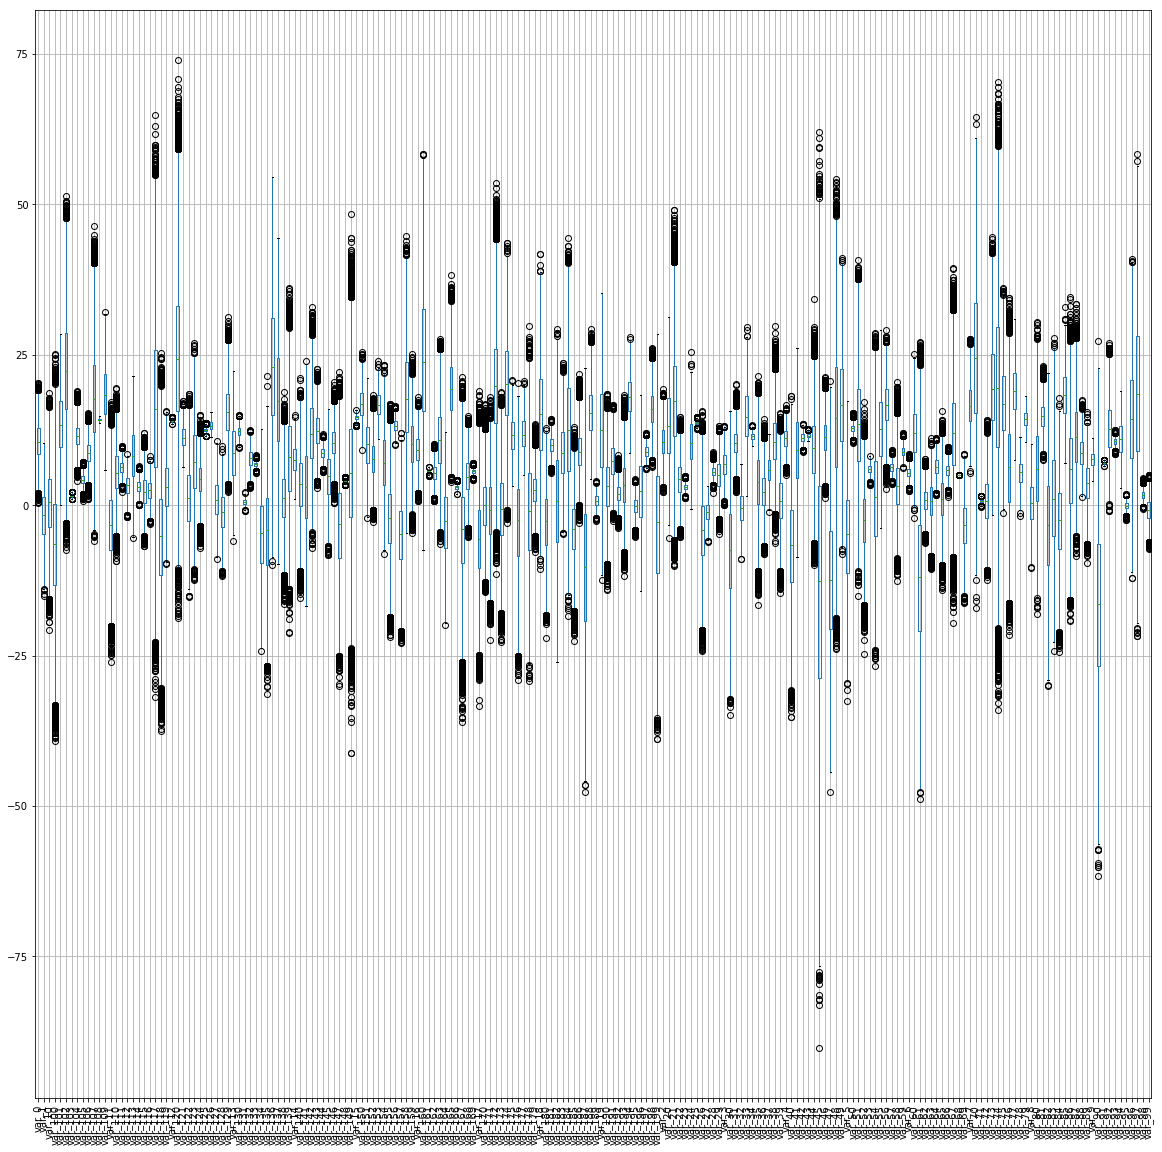

In [8]:
df2.boxplot(figsize=(20, 20), rot=90)

#### Em alguns atributos, é possível dectectar a presença de outiliers, nesse caso é necessário um pouco de atenção e verificar a necessidade de normalizar os dados.

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, QuantileTransformer, MinMaxScaler

In [10]:
x_st = Normalizer().fit_transform(df2)

Normalizados:
Soma dos 3 primeiros componentes: 0.1285376090609561


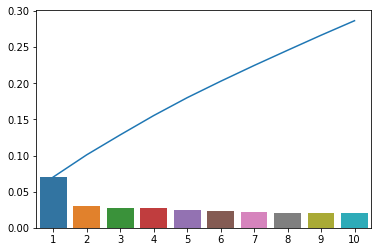

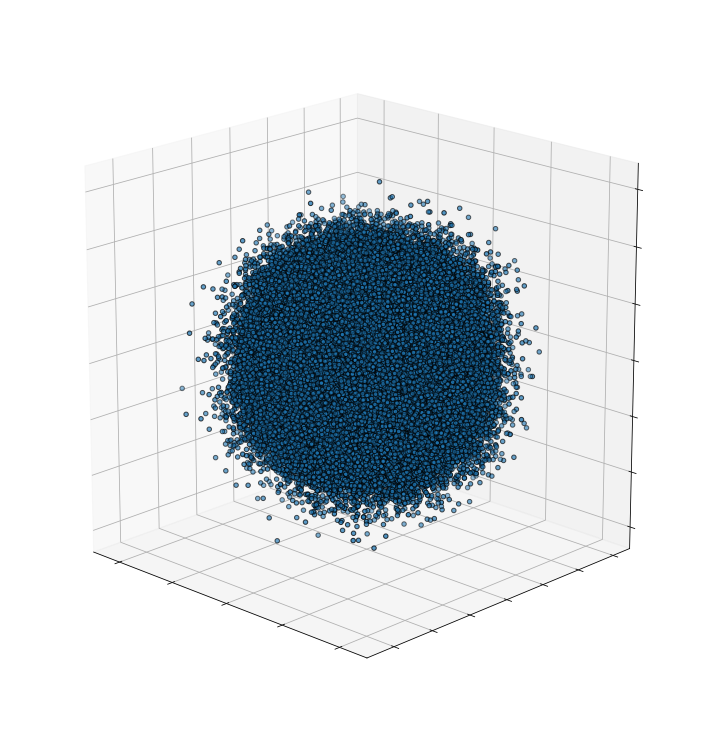

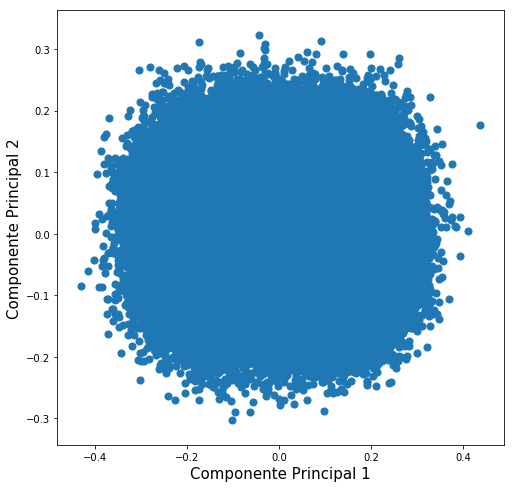

array([[-3.45089331e-02, -1.40321162e-01, -1.09965023e-02, ...,
         1.16357040e-01,  3.15186290e-03, -7.29477667e-05],
       [ 1.95618470e-01,  6.38874990e-02, -7.41818778e-03, ...,
         3.99662762e-02, -1.45566416e-02,  1.17578606e-01],
       [-2.39871931e-02, -8.81922818e-03,  6.98643009e-02, ...,
         3.90350240e-03,  4.83399674e-02,  3.50658357e-02],
       ...,
       [ 2.17808655e-01,  4.78885699e-02,  1.86364416e-01, ...,
         1.01478755e-02,  2.93472162e-02,  9.88472497e-03],
       [ 1.58665937e-01, -1.12315237e-01,  1.14202906e-01, ...,
         1.74276276e-02, -3.16739842e-02,  7.23895316e-02],
       [-3.66563476e-02,  5.06785113e-02,  6.92552704e-02, ...,
        -7.18603612e-02, -1.08937474e-02, -4.60359598e-03]])

In [11]:
print("Normalizados:")
pca_view(x_st, 10) # normalizado
#print("Dados originais:")
#pca_view(df2, 10) # dados reais

In [12]:
classes = df[['ID_code','target']].groupby(['target']).count()

In [13]:
classes

,ID_code
target,
0,179902
1,20098


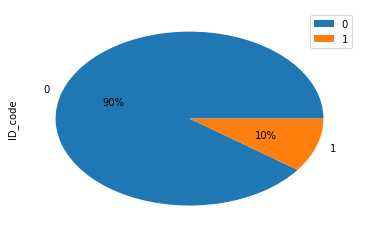

In [14]:
classes.plot.pie(y='ID_code', autopct='%1.0f%%')

In [15]:
from imblearn.over_sampling import SMOTE, ADASYN 

In [16]:
sm = SMOTE(random_state=42)

In [17]:
ada = ADASYN(random_state=42)

### Aparentemente a disposição dos dados está mais para não linear do que uma apresentação linear, conforme visto anteriormente na técnica PCA, vou confirmar isso também utilizando um SVM sem kernel.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import sklearn
import xgboost
from sklearn.model_selection import GridSearchCV

In [74]:
df3 = df.copy()
df3 = df3.sample(frac=1, replace=True, random_state=1)

In [75]:
X = df3[df3.columns.difference(['ID_code','target'])].copy()
y = df3['target'].values

In [76]:
X_res, y_res = sm.fit_resample(X, y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.75, test_size=0.25)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [ ]:
# svm = SVC()
# svm.fit(X_train, y_train)
# print(svm_lin.score(X_test, y_test)) 
#print("R2",cross_val_score(svm_lin, X_test, y_test, cv=5, scoring='r2'))

In [ ]:
#print(sklearn.metrics.classification_report(y_test, svm.predict(X_test)))

## RandomForest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
#print("R2",cross_validate(rf, X, y, cv=5))

In [ ]:
print(sklearn.metrics.classification_report(y_test, rf.predict(X_test)))

## GradientBoosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print(gb.score(X_test, y_test))
#print("R2",cross_validate(gb, X, y, cv=5, scoring=('r2')))

## XGBoost

In [ ]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb.score(X_test, y_test))
#print("R2",cross_validate(xgb, X, y, cv=5, scoring=('r2')))

In [ ]:
print(xgb.score(X_test, y_test))

In [ ]:
print(sklearn.metrics.classification_report(y_test, xgb.predict(X_test)))

In [ ]:
from imblearn.ensemble import RUSBoostClassifier, BalancedRandomForestClassifier

In [ ]:
clf = BalancedRandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

In [ ]:
print(sklearn.metrics.classification_report(y_test, clf.predict(X_test)))

## MLP

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.1)
mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))

0.943528625529071


In [24]:
print(sklearn.metrics.classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      4535
           1       0.91      0.98      0.94      4443

   micro avg       0.94      0.94      0.94      8978
   macro avg       0.95      0.94      0.94      8978
weighted avg       0.95      0.94      0.94      8978



In [30]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}

In [41]:
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=10)

In [47]:
clf.fit(X_train, y_train)

C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 4950 candidates, totalling 14850 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Paralle

[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 76.9min
[Parallel(n_jobs=-1)]: Done 9377 tasks      | elapsed: 77.6min
[Parallel(n_jobs=-1)]: Done 9514 tasks      | elapsed: 78.4min
[Parallel(n_jobs=-1)]: Done 9653 tasks      | elapsed: 79.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 79.9min
[Parallel(n_jobs=-1)]: Done 9933 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done 10074 tasks      | elapsed: 81.6min
[Parallel(n_jobs=-1)]: Done 10217 tasks      | elapsed: 82.6min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 83.4min
[Parallel(n_jobs=-1)]: Done 10505 tasks      | elapsed: 84.3min
[Parallel(n_jobs=-1)]: Done 10650 tasks      | elapsed: 85.3min
[Parallel(n_jobs=-1)]: Done 10797 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 10944 tasks      | elapsed: 87.4min
[Parallel(n_jobs=-1)]: Done 11093 tasks      | elapsed: 88.2min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 89.0min
[Parallel(n_jobs=-1)]: Done 11393 tasks      |

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]), 'hidden_layer_sizes': array([10, 11, 12, 13, 14]), 'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [49]:
print(clf.score(X_test, y_test))
print(clf.best_params_)

0.9306930693069307
{'alpha': 0.1, 'hidden_layer_sizes': 12, 'max_iter': 1000, 'random_state': 4, 'solver': 'lbfgs'}


In [50]:
print(sklearn.metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       477
           1       0.88      1.00      0.93       432

   micro avg       0.93      0.93      0.93       909
   macro avg       0.94      0.93      0.93       909
weighted avg       0.94      0.93      0.93       909



In [78]:
mlp = MLPClassifier(hidden_layer_sizes=12, alpha=0.1, max_iter=1000, random_state=4, solver='lbfgs')


In [79]:
mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))

0.7849610372310903


In [80]:
print(sklearn.metrics.classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     45131
           1       0.78      0.79      0.79     44955

   micro avg       0.78      0.78      0.78     90086
   macro avg       0.79      0.78      0.78     90086
weighted avg       0.79      0.78      0.78     90086



In [71]:
print(sklearn.metrics.classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     22519
           1       0.78      0.80      0.79     22451

   micro avg       0.79      0.79      0.79     44970
   macro avg       0.79      0.79      0.79     44970
weighted avg       0.79      0.79      0.79     44970



In [ ]:
from ultimate.mlp import MLP

In [ ]:
param = {
    'loss_type': 'mse',
    'layer_size': [X_train.shape[1],16,16,16,1],
    'activation': 'relu',
    'output_range': [0, 1],
    'output_shrink': 0.001,
    'importance_mul': 0.0001,
    'importance_out': True,
    'rate_init': 0.02, 
    'rate_decay': 0.9, 
    'epoch_train': 50, 
    'epoch_decay': 1,
    'verbose': 1,
}

In [ ]:
param = (layer_size=[X_train.shape[1], 8, 8, 8, 1], rate_init=0.02, loss_type="mse", epoch_train=100, epoch_decay=10, verbose=1)

In [ ]:
mlp2 = MLP(param).fit(X_train, y_train)

#### Até agora, as técnicas XGBoost, GB, RF e SVM linear estão apresentando uma melhor performance

A próxima abordagem é ajustar os hiper parâmetros, geralmente o comum é utilizar um técnica de GridSearch.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
params = {
        'min_child_weight': [1, 5, 10, 20, 30],
        'gamma': [0.5, 1, 1.5, 2, 5, 10, 20, 30, 40, 50, 90, 100, 150],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 15, 50]
        }
param_comb = 5

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='r2', n_jobs=4, cv=5, random_state=1001 )

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
results_hp = cross_validate(random_search.best_estimator_, X, y, cv=5, scoring=('r2'))

In [ ]:
results_nm = cross_validate(xgb, X, y, cv=5, scoring=('r2'))

In [ ]:
print("XGB BH:", np.mean(results_hp['test_score']))
print("XGB NM:", np.mean(results_nm['test_score']))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
xgboost.plot_importance(xgb, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
xgboost.plot_importance(xgb, ax=ax)

In [51]:
test_df = pd.read_csv('data/test.csv')

In [26]:
test_df = pre_process(test_df)

NameError: name 'pre_process' is not defined

In [52]:
test_df2 = test_df[test_df.columns.difference(['ID_code','target'])].copy()

In [ ]:
pca_view(test_df2)

In [81]:
y_test = mlp.predict(test_df2)

In [82]:
results_df = pd.DataFrame(data={'ID_code':test_df['ID_code'], 'target':y_test})
results_df.to_csv('submission-mlp-05.csv', index=False)